In [ ]:
#Hi This is going to be my first independant project in my journey of Visualization.
#Let's Start
#Visualization is used to display data into graphs making it easy to understand.
#In this tutorial, we will create data visualizations of popular YouTube channels using Python, Pandas, Plotly Express, and Google Colab.
#We will use a histogram to look at subscriber counts, a pie chart to compare video categories, and a box plot to find patterns in the years that creators started YouTubing.

In [1]:
import pandas as pd
import io
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [2]:
#We are going to import our data into our notebook.
#After downloading your dataset, you should return to your handy dandy Google Colab notebook.
#Download Link - https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data
from google.colab import files
uploaded = files.upload()

Saving most_subscribed_youtube_channels.csv to most_subscribed_youtube_channels.csv


In [3]:
#df variable saves dataframe returned from read_csv
#uploaded is a dictionary with file names
df = pd.read_csv(io.BytesIO(uploaded['most_subscribed_youtube_channels.csv']))
display(df)

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013
...,...,...,...,...,...,...,...
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012


Data Shape: (1000, 7)

Descriptive Statistics:


,subscribers,video views,video count
count,1000,1000,1000
unique,286,991,856
top,"11,100,000",0,0
freq,21,10,10


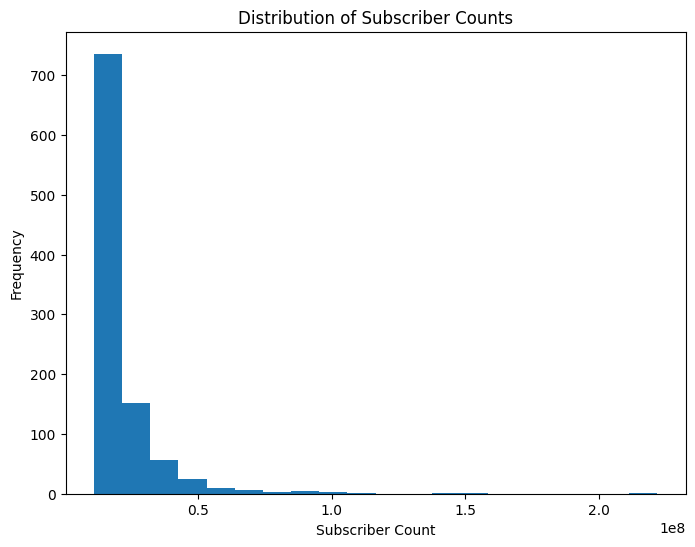


Correlation Matrix:


,subscribers,video views,video count
subscribers,1.000000,0.746863,0.061532
video views,0.746863,1.000000,0.148523
video count,0.061532,0.148523,1.000000



Unique Categories:
['Music' 'Film & Animation' 'Education' 'Shows' nan 'Gaming'
 'Entertainment' 'People & Blogs' 'Sports' 'Howto & Style'
 'News & Politics' 'Comedy' 'Trailers' 'Nonprofits & Activism'
 'Science & Technology' 'Movies' 'Pets & Animals' 'Autos & Vehicles'
 'Travel & Events']


In [11]:
# Data Shape
print("Data Shape:", df.shape)

# Descriptive Statistics
print("\nDescriptive Statistics:")
numerical_cols = ['subscribers', 'video views', 'video count']
display(df[numerical_cols].describe())

# Data Distribution (Subscriber Count)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['subscribers'].str.replace(',', '').astype(int), bins=20)
plt.xlabel("Subscriber Count")
plt.ylabel("Frequency")
plt.title("Distribution of Subscriber Counts")
plt.show()

# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df[['subscribers', 'video views' , 'video count']].apply(lambda x: x.str.replace(',', '').astype(int)).corr()
display(correlation_matrix)

# Unique Values (Category)
print("\nUnique Categories:")
print(df['category'].unique())

In [12]:
# 1. Handle Missing Values
df.dropna(inplace=True)  # Remove rows with missing values

# 2. Convert Data Types
df['subscribers'] = df['subscribers'].str.replace(',', '').astype(int)
df['video views'] = df['video views'].str.replace(',', '').astype(int)
df['video count'] = df['video count'].str.replace(',', '').astype(int)

# 3. Select Relevant Columns
relevant_columns = ['rank', 'Youtuber', 'subscribers', 'video views', 'video count', 'category']
df_visualization = df[relevant_columns]

display(df_visualization.head())

,rank,Youtuber,subscribers,video views,video count,category
0,1,T-Series,222000000,198459090822,17317,Music
1,2,YouTube Movies,154000000,0,0,Film & Animation
2,3,Cocomelon - Nursery Rhymes,140000000,135481339848,786,Education
3,4,SET India,139000000,125764252686,91271,Shows
5,6,PewDiePie,111000000,28469458228,4497,Gaming


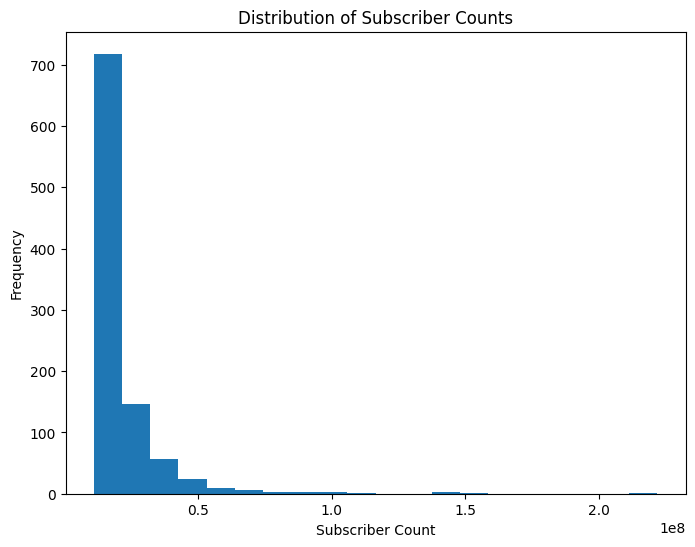

In [13]:
import matplotlib.pyplot as plt

# 1. Histogram of Subscriber Counts
plt.figure(figsize=(8, 6))
plt.hist(df_visualization['subscribers'], bins=20)
plt.xlabel("Subscriber Count")
plt.ylabel("Frequency")
plt.title("Distribution of Subscriber Counts")
plt.show()

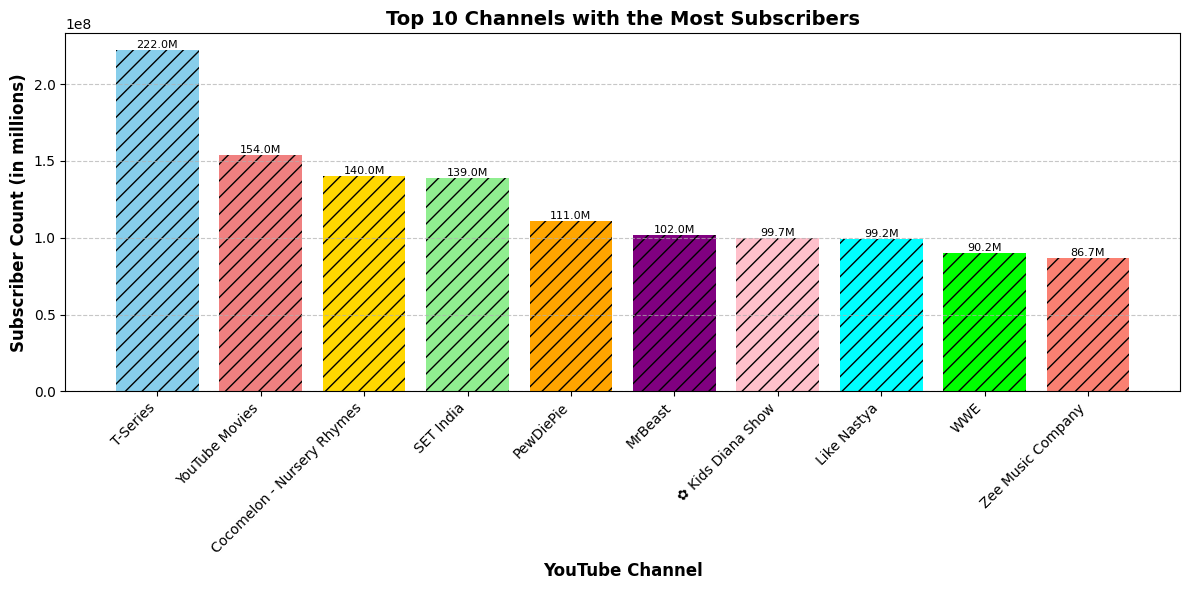

In [14]:
## 2. Bar Chart of Top 10 Channels
top_10_channels = df_visualization.sort_values('subscribers', ascending=False).head(10)
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_channels['Youtuber'], top_10_channels['subscribers'], color=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'orange', 'purple', 'pink', 'cyan', 'lime', 'salmon'], hatch='//')


plt.xlabel("YouTube Channel", fontsize=12, fontweight='bold')
plt.ylabel("Subscriber Count (in millions)", fontsize=12, fontweight='bold')
plt.title("Top 10 Channels with the Most Subscribers", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height/1000000:.1f}M', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

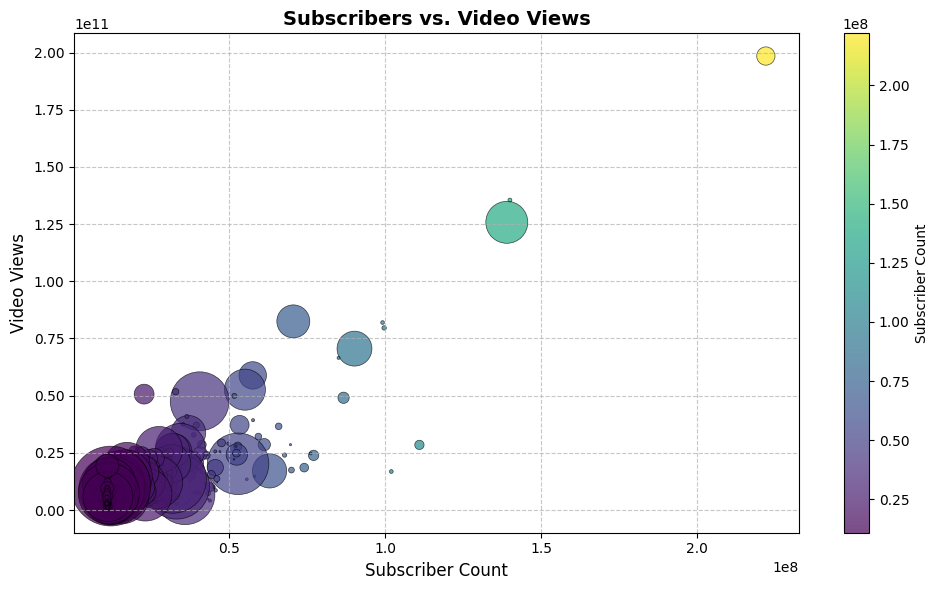

In [21]:
# 3. Scatter Plot of Subscribers vs. Video Views
plt.figure(figsize=(10, 6))
plt.scatter(df_visualization['subscribers'], df_visualization['video views'],
            s=df_visualization['video count'] / 100,
            alpha=0.7,
            c=df_visualization['subscribers'],
            cmap='viridis',
            edgecolors='black',
            linewidths=0.5)
plt.xlabel("Subscriber Count", fontsize=12)
plt.ylabel("Video Views", fontsize=12)
plt.title("Subscribers vs. Video Views", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(label='Subscriber Count')
plt.tight_layout()
plt.show()

<ipython-input-20-1c53874f970e>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_visualization[df_visualization['category'] == category]['subscribers'] for category in df_visualization['category'].unique()],


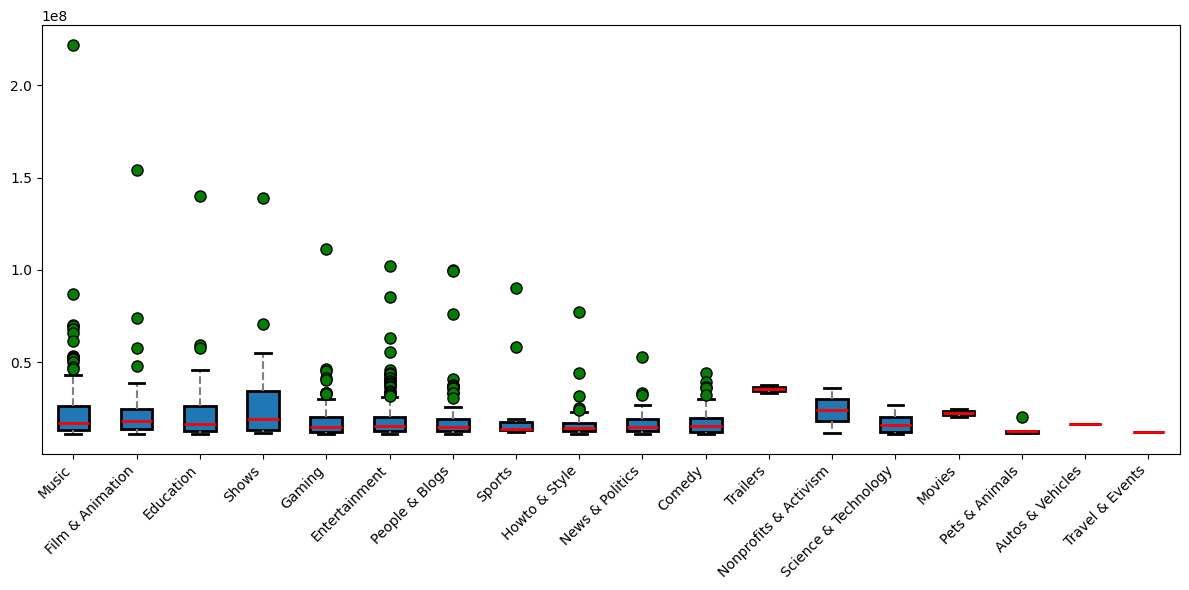

In [20]:
# 4. Box Plot of Subscribers by Category
plt.figure(figsize=(12, 6))

plt.boxplot([df_visualization[df_visualization['category'] == category]['subscribers'] for category in df_visualization['category'].unique()],
            labels=df_visualization['category'].unique(), patch_artist=True,
            boxprops=boxprops, medianprops=medianprops, flierprops=flierprops, whiskerprops=whiskerprops, capprops=capprops)

# Add colors to the boxes - Modified to ensure enough colors and artists
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels by 45 degrees

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


In [22]:
plt.figure(figsize=(10, 5))
i
import plotly.express as px
fig = px.pie(df, values='subscribers', names='category', title='Subscriber Distribution by Category',
             color_discrete_sequence=px.colors.qualitative.Set3)  # Use a color palette for unique colors
fig.show()

<Figure size 1000x500 with 0 Axes>